### Supermarket data science case study - Exploring first data


### Importing packages

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import altair as alt
import vegafusion as vf
import sklearn
import vega_datasets
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns
from matplotlib.patches import Patch


### Functions

In [2]:
def f_concat(l_input):

    # Initialize.
    dummy = ""
    n_len = len(l_input)

    if n_len == 1:
        return l_input[0]

    # Loop through text elements.
    for i in range(n_len - 1):
        dummy = dummy + l_input[i] + ", "

    # Append last element.
    dummy = dummy + "and " + l_input[n_len - 1]

    # Return result.
    return dummy

In [3]:
def f_describe(df_input, n_top=10):

    print("First " + str(n_top) + " rows in de data:")
    display(df_input.head(n_top))

    df_numeric = df_input.select_dtypes(
        include=[
            "uint8",
            "uint16",
            "uint32",
            "uint64",
            "int8",
            "int16",
            "int32",
            "int64",
            "float16",
            "float32",
            "float64",
        ]
    )

    if len(df_numeric.columns):
        print("Numerical data:")
        display(df_numeric.describe())

    df_textual = df_input.select_dtypes(include=["category", "object", "bool"])

    if len(df_textual.columns):
        print("Textual data:")
        display(df_textual.describe())

    v_na = [
        col
        + " ("
        + str(df[col].isna().sum())
        + ", "
        + str(round(100 * df[col].isna().sum() / df.shape[0], 1))
        + "%)"
        for col in df.columns
        if df[col].isna().sum() > 0
    ]

    if len(v_na) > 0:
        print("Features and their number of missing values:")
        display(f_concat(v_na))

### Downcast and transform data
Update formatting of features to optimize memory and standardize column names.

In [4]:
def standardize_column_names(s):
    return s.replace(" ", "")


def optimize_memory(df):
    # Change: Objects to Categorical.                                               #WHEN needed to transform Objects to Categorical?
    # object_cols = df.select_dtypes(include="object").columns
    # if not object_cols.empty:
    #     print("Change: Objects to Categorical")
    #     df[object_cols] = df[object_cols].astype("category")

    # Change: Convert integers to smallest unsigned integer and floats to smallest.
    for old, new in [("integer", "unsigned"), ("float", "float")]:
        print("Change: " + old + " --> " + new)
        for col in df.select_dtypes(include=old).columns:
            df[col] = pd.to_numeric(df[col], downcast=new)

    return df


def month_year_to_int(df, i):
    # Change: Month and Year to integer
    if i == 0:
        print("Change: Month and Year to integer")
        df = df.astype({"month": int, "year": int})

    return df

### Transform date-related columns to datetime format.

In [5]:
# Convert datasets to time series
def transform_date_to_datetime(df, i):
    if i == 0:
        print("Change: Transformed 'year', 'month', 'day' columns to Datetime feature")
        df["date"] = pd.to_datetime(df[["year", "month", "day"]], unit="us")

       # print(
       #     "Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature"
       # )
        #df.drop(columns=["day", "month", "year"], inplace=True)

    else:
        if "date" in df.columns:
            print("Change: Transformed 'date' column to Datetime Dtype")
            df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

    return df

### Import data from local PATH
Import data trough pipeline to downcast the data and transformations

In [6]:
def f_get_data(i=0):

    # Define path.
    c_path = "/Users/Georgi/Documents/EAISI/EASI_4B_Supermarket/Group4B/data/raw/"
    # Identify file.
    v_file = (
        "history-per-year",  # 0
        "history_aggregated",  # 1
        "holidays_events",  # 2
        "items",  # 3
        "oil",  # 4
        "stores",  # 5
        "transactions",
    )  # 6

    # Load data.
    df = (
        pd.read_parquet(c_path + v_file[i] + ".parquet")
        .rename(columns=standardize_column_names)
        .pipe(optimize_memory)
        .pipe(month_year_to_int, i)
        .pipe(transform_date_to_datetime, i)
    )

    # Return data.
    return df

### Importing data

In [7]:
df = f_get_data(0)

Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature


In [8]:
f_describe(df)

First 10 rows in de data:


,id,store_nbr,item_nbr,unit_sales,onpromotion,day,year,month,date
0,0,25,103665,7.0,<NA>,1,2013,1,2013-01-01
1,1,25,105574,1.0,<NA>,1,2013,1,2013-01-01
2,2,25,105575,2.0,<NA>,1,2013,1,2013-01-01
3,3,25,108079,1.0,<NA>,1,2013,1,2013-01-01
4,4,25,108701,1.0,<NA>,1,2013,1,2013-01-01
5,5,25,108786,3.0,<NA>,1,2013,1,2013-01-01
6,6,25,108797,1.0,<NA>,1,2013,1,2013-01-01
7,7,25,108952,1.0,<NA>,1,2013,1,2013-01-01
8,8,25,111397,13.0,<NA>,1,2013,1,2013-01-01
9,9,25,114790,3.0,<NA>,1,2013,1,2013-01-01


Numerical data:


,id,store_nbr,item_nbr,unit_sales,day,year,month
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554879e+00,1.560188e+01,2.015223e+03,6.334971e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01,8.816411e+00,1.299140e+00,3.392866e+00
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04,1.000000e+00,2.013000e+03,1.000000e+00
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00,8.000000e+00,2.014000e+03,3.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00,1.500000e+01,2.015000e+03,6.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00,2.300000e+01,2.016000e+03,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04,3.100000e+01,2.017000e+03,1.200000e+01


Textual data:


,onpromotion
count,103839389
unique,2
top,False
freq,96028767


Features and their number of missing values:


'onpromotion (21657651, 17.3%)'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           uint32        
 1   store_nbr    uint8         
 2   item_nbr     uint32        
 3   unit_sales   float32       
 4   onpromotion  boolean       
 5   day          uint8         
 6   year         int64         
 7   month        int64         
 8   date         datetime64[ns]
dtypes: boolean(1), datetime64[ns](1), float32(1), int64(2), uint32(2), uint8(2)
memory usage: 4.7 GB


### Some Statistics:

In [10]:
print("The data\n")
print(
    f"-> Contains:                {round(df.shape[0]/1e6, 1)} million observations and {df.shape[1]} features.\n"
)
print(
    f"-> Contains:                {df.shape[0]} observations and {df.shape[1]} features.\n"
)
print(f"-> Have feature names:      {f_concat(df.columns)}.\n")
print(f"-> Has optimized size of    {round(sys.getsizeof(df)/1024/1024/1024, 2)} GB.")

The data

-> Contains:                125.5 million observations and 9 features.

-> Contains:                125497040 observations and 9 features.

-> Have feature names:      id, store_nbr, item_nbr, unit_sales, onpromotion, day, year, month, and date.

-> Has optimized size of    4.68 GB.


In [228]:
# df = f_get_data(0)
# f_describe(df)
# df.head()
# df.tail(10)
df.sample(20)
# df.info()
# df.describe()
# df.nunique

,id,store_nbr,item_nbr,unit_sales,onpromotion,day,year,month,date
6153979,1710511,54,557285,7.0,<NA>,12,2013,2,2013-02-12
8399929,3956461,2,511172,2.0,<NA>,7,2013,4,2013-04-07
124936906,124936906,36,2027649,2.0,False,10,2017,8,2017-08-10
113167232,113167232,37,1932492,10.0,False,21,2017,4,2017-04-21
106092371,106092371,50,783243,10.0,False,12,2017,2,2017-02-12
74417582,97660262,15,108833,2.0,False,22,2016,11,2016-11-22
83244185,74080679,32,1696025,3.0,True,22,2016,3,2016-03-22
39528596,39528596,49,103665,8.0,False,17,2015,1,2015-01-17
73111021,96353701,50,2005335,2.0,False,8,2016,11,2016-11-08
45499109,63124555,51,1072167,8.0,False,25,2015,11,2015-11-25


Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


Numerical data:


,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


Textual data:


,family
count,4100
unique,33
top,GROCERY I
freq,1334


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   uint32
 1   family      4100 non-null   object
 2   class       4100 non-null   uint16
 3   perishable  4100 non-null   uint8 
dtypes: object(1), uint16(1), uint32(1), uint8(1)
memory usage: 60.2+ KB


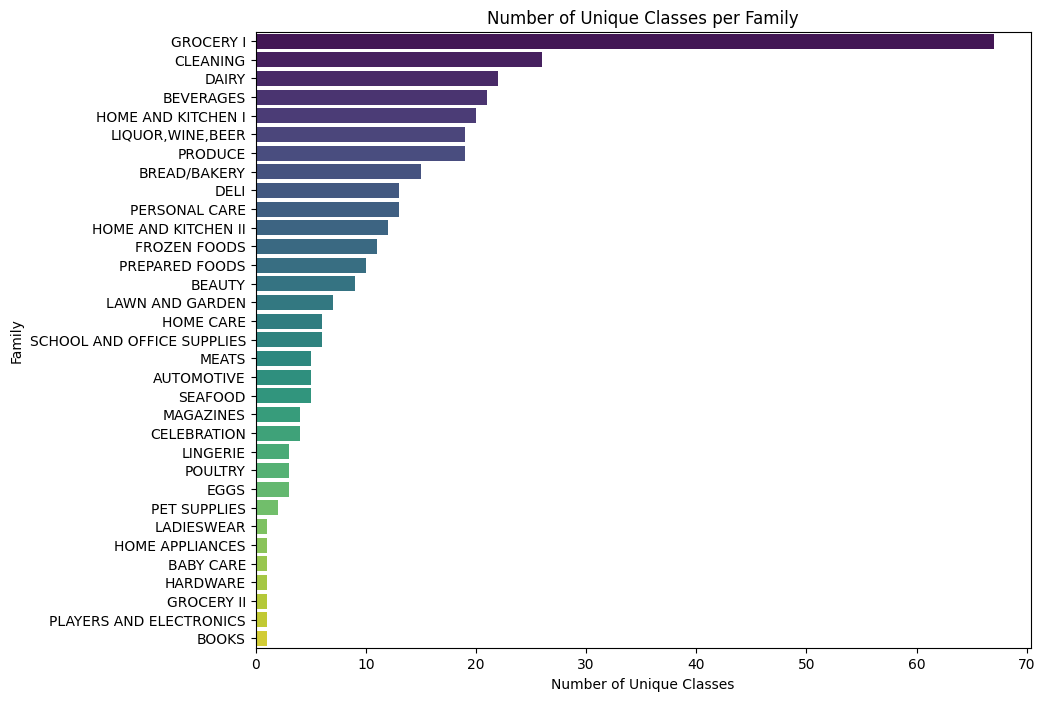

In [11]:
df = f_get_data(3)
f_describe(df)
df.info()

# Count the number of unique classes per family and sort them in descending order
class_counts = df.groupby('family')['class'].nunique().reset_index().sort_values(by='class', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 8))  # Make the plot taller to accommodate vertical bars
sns.barplot(y='family', x='class', data=class_counts, palette='viridis')

# Adding titles and labels
plt.title('Number of Unique Classes per Family')
plt.xlabel('Number of Unique Classes')
plt.ylabel('Family')
plt.show()

In [186]:
# Group by class and count the number of unique families for each class
class_family_counts = df.groupby('class')['family'].nunique().reset_index()

# Filter to find classes that belong to multiple families
classes_in_multiple_families = class_family_counts[class_family_counts['family'] > 1]

print(classes_in_multiple_families)

Empty DataFrame
Columns: [class, family]
Index: []


In [187]:
distinct_classes = df['class'].unique()

# Count the number of distinct classes
num_distinct_classes = len(distinct_classes)

print(f'There are {num_distinct_classes} distinct classes.')
print('The distinct classes are:', distinct_classes)

There are 337 distinct classes.
The distinct classes are: [1093 1067 3008 1028 2712 1045 1034 1044 1092 1032 1030 1075 2636 2644
 3044 1004 2416 2502 1062 3024 1072 1016 4126 3034 1014 1040 1084 7034
 1056 3090 3026 1042 1122 6810 2124 3020 2114 1026 2112 1096 2704 2708
 1013 3038 1048 2116 3032 1124 1066 2718 1236 1080 3004 1058 6824 1136
 3016 1006 2302 1010 2632 2226 2412 1078 1074 1036 3046 3022 3018 1035
 2104 1086 1039 6155 2806 1120 1002 2218 2220 1060 2986 2720 3014 6806
 4114 1087 3015 2702 3006 2752 2652 2630 2640 3010 3012 1024 1038 2716
 1076 2966 1386 2102 7016 2980 2962 3030 1079 1012 2690 1070 2662 3005
 2142 2960 1054 4122 2850 4222 1033 2306 1336 2756 1330 2664 4214 2956
 3028 1338 2802 4254 2722 1027 2642 2854 2222 1005 2228 2238 3060 1318
 3040 1320 2214 6706 2304 1025 2128 6920 2130 1008 3029 3035 2750 1088
 2784 1302 2646 6918 2108 1094 1064 4252 2904 2372 7002 1314 1126 2210
 1022 2714 2156 1138 1003 1364 1380 1029 2504 1132 2242 2654 2122 2246
 2070 1077 1312 695

In [12]:
distinct_items = df['item_nbr'].unique()

# Count the number of distinct classes
num_distinct_items= len(distinct_items)

print(f'There are {num_distinct_items} distinct items.')
print('The distinct classes are:', distinct_items)

There are 4100 distinct items.
The distinct classes are: [  96995   99197  103501 ... 2132957 2134058 2134244]


In [188]:
df_0 =f_get_data(0)
agg = df_0.groupby(["month", "store_nbr"]).agg({"unit_sales": "mean"}).reset_index()
 
# Set the row limit to a higher value
alt.data_transformers.disable_max_rows()
 
# Create the line plot
line_chart = (
    alt.Chart(agg)
    .mark_line()
    .encode(
        x="month:O",
        y="unit_sales:Q",
        color="store_nbr:N",
        tooltip=["month", "store_nbr", "unit_sales"],
    )
    .properties(title="Average Sales by Date and Store number", width=1200, height=600)
    .interactive()
)
 
# Display the plot
line_chart.show()

Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature


alt.Chart(...)

In [232]:
# Sales History per year
df_0 = f_get_data(0)
# Holidays
df_2 = f_get_data(2)
# Items
df_3 = f_get_data(3)
# Stores
df_5 = f_get_data(5)


Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature
Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype
Change: integer --> unsigned
Change: float --> float
Change: integer --> unsigned
Change: float --> float


In [238]:
def onpromotion_month_count(df):

    if "onpromotion" in df.columns:

        df["onpromotion_month_count"] = df.groupby(
            ["item_nbr", "store_nbr", "day", "month", "year"]
        )["onpromotion"].transform("sum")

        print(
            "Change: 'onpromotion' column transformed to 'onpromotion_month_count' feature."
        )
    else:

        print("The DataFrame does not contain an 'onpromotion' column.")

    return df

In [239]:
df_0_agg = (
    onpromotion_month_count(df_0)  # Transformation to 'onpromotion_month_count' feature
    .drop(
        columns=["id", "date", "onpromotion"]
    )  # Drop unnecessary columns "id", "date", "onpromotion"
    .groupby(["month", "year", "store_nbr", "item_nbr"])
    .agg({"unit_sales": "sum", "onpromotion_month_count": "sum"})
    .reset_index()
)

Change: 'onpromotion' column transformed to 'onpromotion_month_count' feature.


In [240]:
# Merge of df_0_agg with df_3 and df_5

df_03_join = df_0_agg.merge(df_3, on="item_nbr", how="left")

df_035_join = df_03_join.merge(df_5, on="store_nbr", how="left")

In [241]:
print("The transformed and joined data\n")
print(
    f"-> Contains:                {round(df_035_join.shape[0]/1e6, 1)} million observations and {df_035_join.shape[1]} features.\n"
)
print(
    f"-> Contains:                {df_035_join.shape[0]} observations and {df_035_join.shape[1]} features.\n"
)
print(f"-> Have feature names:      {f_concat(df_035_join.columns)}.\n")
print(
    f"-> Has optimized size of    {round(sys.getsizeof(df_035_join)/1024/1024/1024, 2)} GB."
)

The transformed and joined data

-> Contains:                5.8 million observations and 13 features.

-> Contains:                5813304 observations and 13 features.

-> Have feature names:      month, year, store_nbr, item_nbr, unit_sales, onpromotion_month_count, family, class, perishable, city, state, type, and cluster.

-> Has optimized size of    1.58 GB.


In [242]:
# Sample of final merged dataframe 'df_02_join'

df_035_join.sample(20)

,month,year,store_nbr,item_nbr,unit_sales,onpromotion_month_count,family,class,perishable,city,state,type,cluster
5569060,12,2015,14,2010779,440.000000,0,GROCERY I,1032,0,Riobamba,Chimborazo,C,7
1668691,4,2015,37,1370548,101.000000,0,HOME AND KITCHEN I,6257,0,Cuenca,Azuay,D,2
4470371,9,2016,41,414421,46.000000,0,GROCERY I,1040,0,Machala,El Oro,D,4
2575995,6,2014,17,812726,73.000000,0,CLEANING,3034,0,Quito,Pichincha,C,12
2562367,6,2014,6,1309672,41.000000,0,GROCERY I,1045,0,Quito,Pichincha,D,13
1551532,4,2014,4,470762,47.000000,0,CLEANING,3004,0,Quito,Pichincha,D,9
2692947,6,2015,37,1370589,34.000000,0,HOME AND KITCHEN I,6269,0,Cuenca,Azuay,D,2
2765624,6,2016,15,938566,194.000000,0,GROCERY I,1042,0,Ibarra,Imbabura,C,15
3729783,8,2015,14,158956,400.000000,0,CLEANING,3038,0,Riobamba,Chimborazo,C,7
3211892,7,2015,23,318935,51.000000,4,DELI,2652,1,Ambato,Tungurahua,D,9


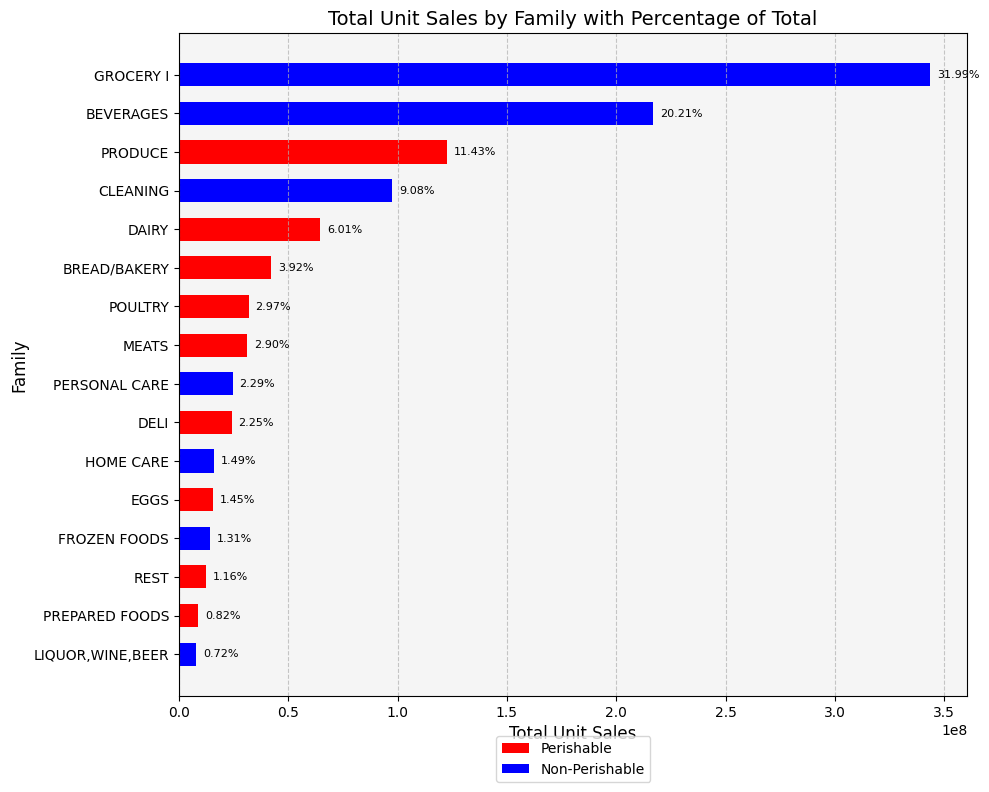

In [243]:


# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Group by family, count the number of unique store_nbr and sum the unit_sales
family_store_count = df_035_join.groupby('family').agg({'store_nbr': 'nunique', 'unit_sales': 'sum'})

# Rename columns for clarity
family_store_count.rename(columns={'store_nbr': 'Unique_Store_Count', 'unit_sales': 'Total_Unit_Sales'}, inplace=True)

# Determine if each family is perishable or not
perishable_mapping = df_035_join.groupby('family')['perishable'].max()

# Add a new column indicating whether the family is perishable or not
family_store_count['Perishable'] = perishable_mapping

# Calculate the percentage of total unit sales for each family
total_unit_sales = family_store_count['Total_Unit_Sales'].sum()
family_store_count['Percentage_of_Total'] = (family_store_count['Total_Unit_Sales'] / total_unit_sales) * 100

# Group families with percentage of total unit sales less than 0.5% into "Rest"
rest = family_store_count[family_store_count['Percentage_of_Total'] < 0.5].sum()
rest.name = 'REST'

# Remove the grouped families and add the "Rest" category
family_store_count = family_store_count[family_store_count['Percentage_of_Total'] >= 0.5]
family_store_count = pd.concat([family_store_count, pd.DataFrame(rest).T])

# Sort the table by the total unit sales in descending order
family_store_count_sorted = family_store_count.sort_values(by='Total_Unit_Sales', ascending=True)

# Define colors for perishable and non-perishable families
colors = {True: 'red', False: 'blue'}

# Plotting
plt.figure(figsize=(10, 8))  # Larger figsize
bars = plt.barh(family_store_count_sorted.index, family_store_count_sorted['Total_Unit_Sales'], height=0.6, color=[colors[perishable] for perishable in family_store_count_sorted['Perishable']])
plt.ylabel('Family', fontsize=12)
plt.xlabel('Total Unit Sales', fontsize=12)
plt.title('Total Unit Sales by Family with Percentage of Total', fontsize=14)

# Create a legend explaining the colors
legend_elements = [Patch(facecolor='red', label='Perishable'),
                   Patch(facecolor='blue', label='Non-Perishable')]
plt.legend(handles=legend_elements, loc='upper center', fontsize=10, bbox_to_anchor=(0.5, -0.05))

# Annotate bars with percentage of total unit sales
for bar, percentage in zip(bars, family_store_count_sorted['Percentage_of_Total']):
    width = bar.get_width()
    plt.annotate(f'{percentage:.2f}%', 
                 xy=(width, bar.get_y() + bar.get_height() / 2), 
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords="offset points", 
                 ha='left', va='center',
                 fontsize=8, color='black')  # Adjust the font size and color here

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Customize background color
plt.gca().set_facecolor('#f5f5f5')

plt.tight_layout()  # To make sure the labels and titles fit into the plot area

plt.show()







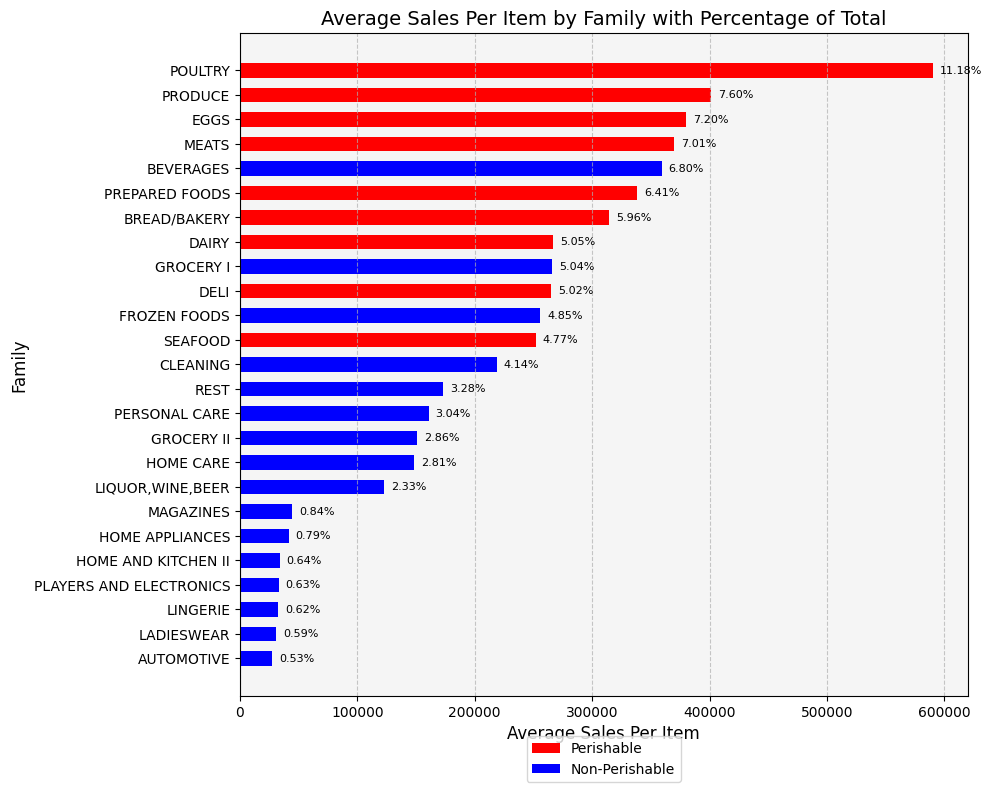

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Group by family, count the number of unique store_nbr and item_nbr, and sum the unit_sales
family_store_count = df_035_join.groupby('family').agg({'store_nbr': 'nunique', 'item_nbr': 'nunique', 'unit_sales': 'sum'})

# Calculate the average sales per item by dividing total unit sales by the number of unique items
family_store_count['Average_Sales_Per_Item'] = family_store_count['unit_sales'] / family_store_count['item_nbr']

# Rename columns for clarity
family_store_count.rename(columns={'store_nbr': 'Unique_Store_Count', 'unit_sales': 'Total_Unit_Sales', 'item_nbr': 'Unique_Item_Count'}, inplace=True)

# Determine if each family is perishable or not
perishable_mapping = df_035_join.groupby('family')['perishable'].max()

# Add a new column indicating whether the family is perishable or not
family_store_count['Perishable'] = perishable_mapping

# Calculate the percentage of average sales per item for each family
total_average_sales = family_store_count['Average_Sales_Per_Item'].sum()
family_store_count['Percentage_of_Total'] = (family_store_count['Average_Sales_Per_Item'] / total_average_sales) * 100

# Group families with percentage of average sales per item less than 0.5% into "Rest"
rest = family_store_count[family_store_count['Percentage_of_Total'] < 0.5].sum()
rest.name = 'REST'

# Remove the grouped families and add the "Rest" category
family_store_count = family_store_count[family_store_count['Percentage_of_Total'] >= 0.5]
family_store_count = pd.concat([family_store_count, pd.DataFrame(rest).T])

# Sort the table by the average sales per item in descending order
family_store_count_sorted = family_store_count.sort_values(by='Average_Sales_Per_Item', ascending=True)

# Define colors for perishable and non-perishable families
colors = {True: 'red', False: 'blue'}

# Plotting
plt.figure(figsize=(10, 8))  # Larger figsize
bars = plt.barh(family_store_count_sorted.index, family_store_count_sorted['Average_Sales_Per_Item'], height=0.6, color=[colors[perishable] for perishable in family_store_count_sorted['Perishable']])
plt.ylabel('Family', fontsize=12)
plt.xlabel('Average Sales Per Item', fontsize=12)
plt.title('Average Sales Per Item by Family with Percentage of Total', fontsize=14)

# Create a legend explaining the colors
legend_elements = [Patch(facecolor='red', label='Perishable'),
                   Patch(facecolor='blue', label='Non-Perishable')]
plt.legend(handles=legend_elements, loc='upper center', fontsize=10, bbox_to_anchor=(0.5, -0.05))

# Annotate bars with percentage of total average sales per item
for bar, percentage in zip(bars, family_store_count_sorted['Percentage_of_Total']):
    width = bar.get_width()
    plt.annotate(f'{percentage:.2f}%', 
                 xy=(width, bar.get_y() + bar.get_height() / 2), 
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords="offset points", 
                 ha='left', va='center',
                 fontsize=8, color='black')  # Adjust the font size and color here

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Customize background color
plt.gca().set_facecolor('#f5f5f5')

plt.tight_layout()  # To make sure the labels and titles fit into the plot area

plt.show()


/var/folders/4z/hxnkb6_x7jn5rtztbhslhxdm0000gn/T/ipykernel_32276/2815474241.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_sales = df_035_join.groupby('class')['unit_sales'].sum().reset_index()


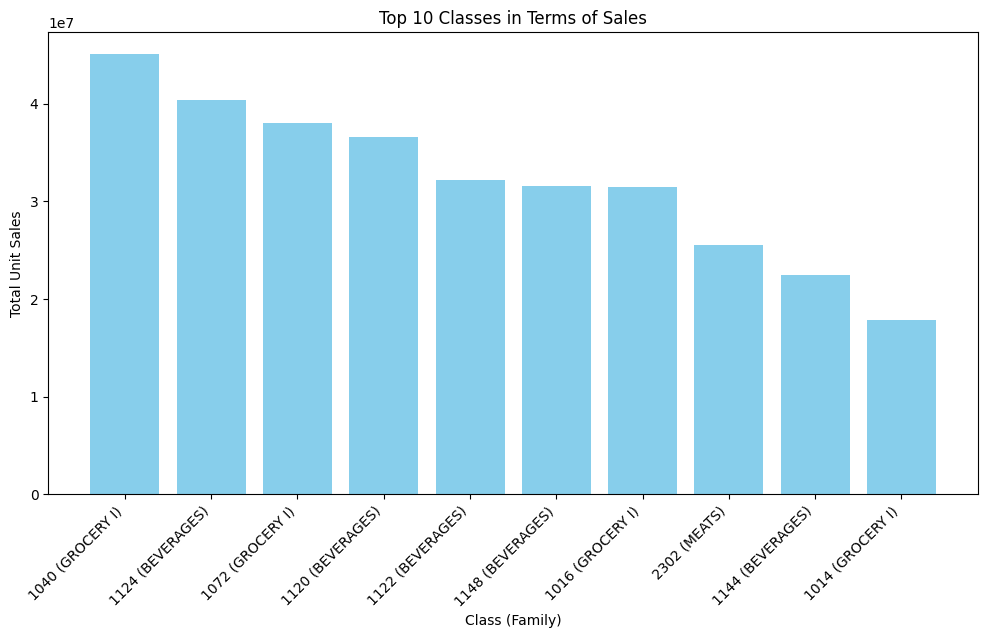

In [244]:
df_035_join['class'] = df_035_join['class'].astype('category')

# Aggregate the data by class and sum the unit_sales
class_sales = df_035_join.groupby('class')['unit_sales'].sum().reset_index()

# Merge with the family data to get family names
class_family_sales = pd.merge(class_sales, df[['class', 'family']].drop_duplicates(), on='class')

# Sort the classes by unit sales in descending order and get the top 10 classes
top_classes = class_family_sales.sort_values(by='unit_sales', ascending=False).head(10)

# Combine class and family for better visualization
top_classes['class_family'] = top_classes['class'].astype(str) + ' (' + top_classes['family'] + ')'

# Plotting the data
plt.figure(figsize=(12,6))
plt.bar(top_classes['class_family'], top_classes['unit_sales'], color='skyblue')
plt.xlabel('Class (Family)')
plt.ylabel('Total Unit Sales')
plt.title('Top 10 Classes in Terms of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

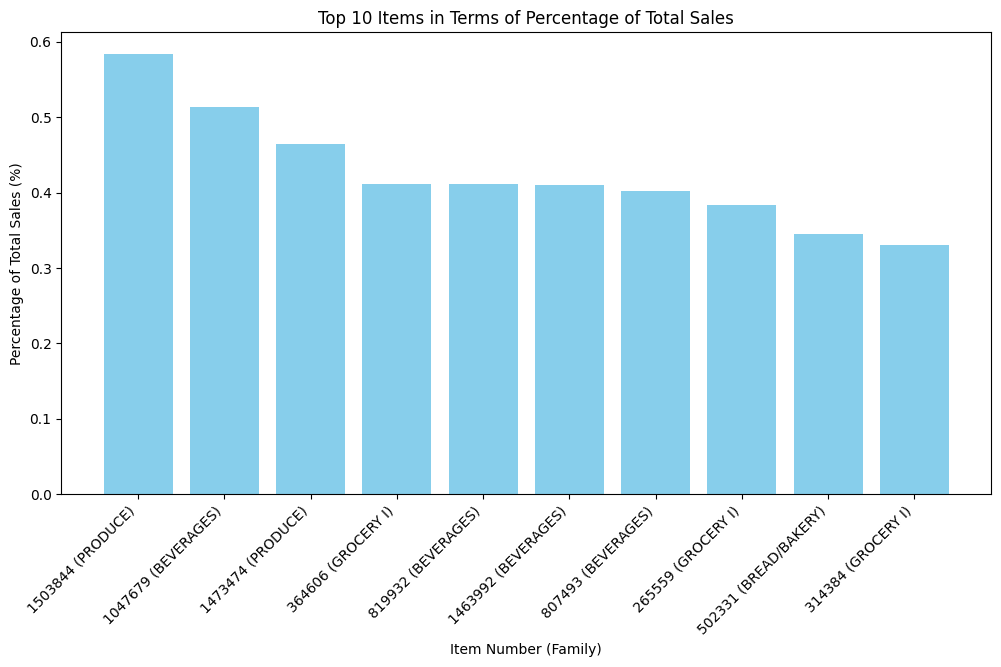

In [245]:
# Convert the 'class' column to categorical
df_035_join['class'] = df_035_join['class'].astype('category')

# Aggregate the data by item_nbr and sum the unit_sales
item_sales = df_035_join.groupby('item_nbr')['unit_sales'].sum().reset_index()

# Merge with the family data to get family names
item_family_sales = pd.merge(item_sales, df[['item_nbr', 'family']].drop_duplicates(), on='item_nbr')

# Sort the items by unit sales in descending order and get the top 10 items
top_items = item_family_sales.sort_values(by='unit_sales', ascending=False).head(10)

# Calculate total sales
total_sales = item_sales['unit_sales'].sum()

# Calculate percentage of total sales for the top 10 items
top_items['sales_percentage'] = (top_items['unit_sales'] / total_sales) * 100

# Combine item_nbr and family for better visualization
top_items['item_family'] = top_items['item_nbr'].astype(str) + ' (' + top_items['family'] + ')'

# Plotting the data
plt.figure(figsize=(12,6))
plt.bar(top_items['item_family'], top_items['sales_percentage'], color='skyblue')
plt.xlabel('Item Number (Family)')
plt.ylabel('Percentage of Total Sales (%)')
plt.title('Top 10 Items in Terms of Percentage of Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


In [246]:
import pandas as pd

# Group by family and count the number of unique store_nbr
family_store_count = df_035_join.groupby('family')['store_nbr'].nunique()

# Sort the table in descending order
family_store_count_sorted = family_store_count.sort_values(ascending=False)

# Create a DataFrame with column headers
df_family_store_count = pd.DataFrame({
    'Family': family_store_count_sorted.index,
    'Number of Distinct Stores': family_store_count_sorted.values
})

# Apply modern layout using the styler attribute
styled_table = df_family_store_count.style.set_table_styles([
    {'selector': 'table', 'props': [('border-collapse', 'collapse')]},
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'),
                                  ('color', '#333'),
                                  ('font-weight', 'bold'),
                                  ('padding', '12px'),
                                  ('text-align', 'left')]},
    {'selector': 'td', 'props': [('padding', '12px'), ('text-align', 'left')]},
    {'selector': 'tr:hover', 'props': [('background-color', '#f5f5f5')]}
])

# Display the styled table
styled_table



,Family,Number of Distinct Stores
0,AUTOMOTIVE,54
1,HOME AND KITCHEN I,54
2,SCHOOL AND OFFICE SUPPLIES,54
3,PRODUCE,54
4,PREPARED FOODS,54
5,POULTRY,54
6,PLAYERS AND ELECTRONICS,54
7,PET SUPPLIES,54
8,PERSONAL CARE,54
9,MEATS,54


In [140]:
# Create a new column for year-month combinations
df_035_join['year_month'] = df_035_join['year'].astype(str) + '-' + df_035_join['month'].astype(str)

# Calculate the total number of unique month-year combinations in the entire dataset
total_unique_month_years = df_035_join['year_month'].nunique()

# Calculate the total number of unique month-year combinations each item_nbr has been sold
months_sold = df_035_join.groupby('item_nbr')['year_month'].nunique().reset_index()

# Rename the columns for clarity
months_sold.columns = ['item_nbr', 'total_month_years_sold']

# Filter the items that appear in all unique month-year combinations
items_all_month_years = months_sold[months_sold['total_month_years_sold'] == total_unique_month_years]

# Display the result
print(items_all_month_years)

      item_nbr  total_month_years_sold
2       103501                      56
3       103520                      56
4       103665                      56
5       105574                      56
6       105575                      56
7       105576                      56
8       105577                      56
9       105693                      56
10      105737                      56
12      106716                      56
13      108079                      56
15      108696                      56
16      108698                      56
17      108701                      56
18      108786                      56
19      108797                      56
20      108831                      56
21      108833                      56
22      108862                      56
23      108952                      56
24      111223                      56
25      111397                      56
26      112830                      56
27      114778                      56
28      114790           

In [255]:
# Create a new column for year-month combinations
df_035_join['year_month'] = df_035_join['year'].astype(str) + '-' + df_035_join['month'].astype(str)

# Calculate the total number of unique month-year combinations in the entire dataset
total_unique_month_years = df_035_join['year_month'].nunique()

# Calculate the total number of unique store_nbr
total_unique_stores = df_035_join['store_nbr'].nunique()

# Calculate the total number of unique month-year combinations each item_nbr has been sold
months_sold = df_035_join.groupby('item_nbr')['year_month'].nunique().reset_index()

# Rename the columns for clarity
months_sold.columns = ['item_nbr', 'total_month_years_sold']

# Filter the items that appear in all unique month-year combinations
items_all_month_years = months_sold[months_sold['total_month_years_sold'] == total_unique_month_years]

# Add an extra column showing the total number of unique store_nbr
items_all_month_years['total_unique_stores'] = total_unique_stores

# Display the result
print(items_all_month_years)

      item_nbr  total_month_years_sold  total_unique_stores
2       103501                      56                   54
3       103520                      56                   54
4       103665                      56                   54
5       105574                      56                   54
6       105575                      56                   54
7       105576                      56                   54
8       105577                      56                   54
9       105693                      56                   54
10      105737                      56                   54
12      106716                      56                   54
13      108079                      56                   54
15      108696                      56                   54
16      108698                      56                   54
17      108701                      56                   54
18      108786                      56                   54
19      108797                      56  

/var/folders/4z/hxnkb6_x7jn5rtztbhslhxdm0000gn/T/ipykernel_32276/3549300098.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_all_month_years['total_unique_stores'] = total_unique_stores


In [256]:
# Create a new column for year-month combinations
df_035_join['year_month'] = df_035_join['year'].astype(str) + '-' + df_035_join['month'].astype(str)

# Calculate the total number of unique month-year combinations in the entire dataset
total_unique_month_years = df_035_join['year_month'].nunique()

# Calculate the total number of unique store_nbr
total_unique_stores = df_035_join['store_nbr'].nunique()

# Calculate the total number of unique month-year combinations each item_nbr has been sold
months_sold = df_035_join.groupby('item_nbr')['year_month'].nunique().reset_index()

# Calculate the total unit sales for each item_nbr
total_unit_sales = df_035_join.groupby('item_nbr')['unit_sales'].sum().reset_index()

# Rename the columns for clarity
months_sold.columns = ['item_nbr', 'total_month_years_sold']
total_unit_sales.columns = ['item_nbr', 'total_unit_sales']

# Filter the items that appear in all unique month-year combinations
items_all_month_years = months_sold[months_sold['total_month_years_sold'] == total_unique_month_years]

# Add an extra column showing the total number of unique store_nbr
items_all_month_years['total_unique_stores'] = total_unique_stores

# Merge with the total unit sales
items_all_month_years = items_all_month_years.merge(total_unit_sales, on='item_nbr')

# Add class and family columns by merging with the original DataFrame
items_all_month_years = items_all_month_years.merge(df_035_join[['item_nbr', 'class', 'family']].drop_duplicates(), on='item_nbr')

# Format total_unit_sales in thousands and avoid scientific notation
items_all_month_years['total_unit_sales'] = items_all_month_years['total_unit_sales'] / 1000

# Order the DataFrame by total_unit_sales in descending order
items_all_month_years = items_all_month_years.sort_values(by='total_unit_sales', ascending=False)

# Display the result
items_all_month_years.head(20)
#display(items_all_month_years)
#print(items_all_month_years)

/var/folders/4z/hxnkb6_x7jn5rtztbhslhxdm0000gn/T/ipykernel_32276/673825856.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_all_month_years['total_unique_stores'] = total_unique_stores


,item_nbr,total_month_years_sold,total_unique_stores,total_unit_sales,class,family
1314,1047679,56,54,5512.875000,1120,BEVERAGES
370,364606,56,54,4416.425781,1014,GROCERY I
946,819932,56,54,4410.942871,1122,BEVERAGES
924,807493,56,54,4321.423828,1124,BEVERAGES
225,265559,56,54,4112.827148,1072,GROCERY I
531,502331,56,54,3703.350098,2702,BREAD/BAKERY
283,314384,56,54,3544.341064,1004,GROCERY I
608,559870,56,54,3532.719971,1072,GROCERY I
667,584028,56,54,3252.202881,2302,MEATS
372,364738,56,54,2940.761963,1124,BEVERAGES


In [249]:
# Create a new column for year-month combinations
df_035_join['year_month'] = df_035_join['year'].astype(str) + '-' + df_035_join['month'].astype(str)

# Calculate the total number of unique month-year combinations in the entire dataset
total_unique_month_years = df_035_join['year_month'].nunique()

# Calculate the total number of unique month-year combinations each item_nbr has been sold
months_sold = df_035_join.groupby('item_nbr')['year_month'].nunique().reset_index()

# Rename the columns for clarity
months_sold.columns = ['item_nbr', 'total_month_years_sold']

# Filter the items that appear in all unique month-year combinations
items_all_month_years = months_sold[months_sold['total_month_years_sold'] == total_unique_month_years]

# Merge back to the original DataFrame to get the class and family information
merged_df = df_035_join.merge(items_all_month_years, on='item_nbr')

# Group by class and count the number of unique item_nbr values
unique_items_per_class = merged_df.groupby(['class', 'family'])['item_nbr'].nunique().reset_index()

# Rename the columns for clarity
unique_items_per_class.columns = ['class', 'family', 'unique_items_all_month_years']

# Display the result
print(unique_items_per_class)

     class            family  unique_items_all_month_years
0     1002        AUTOMOTIVE                             0
1     1002         BEVERAGES                             0
2     1002      BREAD/BAKERY                             0
3     1002          CLEANING                             0
4     1002             DAIRY                             0
5     1002              DELI                             0
6     1002              EGGS                             0
7     1002      FROZEN FOODS                             0
8     1002         GROCERY I                            14
9     1002        GROCERY II                             0
10    1002          HARDWARE                             0
11    1002   HOME APPLIANCES                             0
12    1002   LAWN AND GARDEN                             0
13    1002          LINGERIE                             0
14    1002  LIQUOR,WINE,BEER                             0
15    1002             MEATS                            

/var/folders/4z/hxnkb6_x7jn5rtztbhslhxdm0000gn/T/ipykernel_32276/3016197265.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_items_per_class = merged_df.groupby(['class', 'family'])['item_nbr'].nunique().reset_index()


In [259]:
# Create a new column for year-month combinations
df_035_join['year_month'] = df_035_join['year'].astype(str) + '-' + df_035_join['month'].astype(str)

# Calculate the total number of unique month-year combinations in the entire dataset
total_unique_month_years = df_035_join['year_month'].nunique()

# Calculate the total number of unique month-year combinations each item_nbr has been sold
months_sold = df_035_join.groupby('item_nbr')['year_month'].nunique().reset_index()

# Rename the columns for clarity
months_sold.columns = ['item_nbr', 'total_month_years_sold']

# Filter the items that appear in all unique month-year combinations
items_all_month_years = months_sold[months_sold['total_month_years_sold'] == total_unique_month_years]

# Merge back to the original DataFrame to get the class and family information
merged_df = df_035_join.merge(items_all_month_years, on='item_nbr')

# Group by class and family, then count the number of unique item_nbr values
unique_items_per_class = merged_df.groupby(['class', 'family'])['item_nbr'].nunique().reset_index()

# Rename the columns for clarity
unique_items_per_class.columns = ['class', 'family', 'unique_items_all_month_years']

# Filter for the specified families
filtered_families = ['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY']
unique_items_filtered = unique_items_per_class[unique_items_per_class['family'].isin(filtered_families)]

# Display the result
print(unique_items_filtered)

     class     family  unique_items_all_month_years
1     1002  BEVERAGES                             0
3     1002   CLEANING                             0
4     1002      DAIRY                             0
8     1002  GROCERY I                            14
20    1003  BEVERAGES                             0
22    1003   CLEANING                             0
23    1003      DAIRY                             0
27    1003  GROCERY I                             2
39    1004  BEVERAGES                             0
41    1004   CLEANING                             0
42    1004      DAIRY                             0
46    1004  GROCERY I                            24
58    1006  BEVERAGES                             0
60    1006   CLEANING                             0
61    1006      DAIRY                             0
65    1006  GROCERY I                             0
77    1008  BEVERAGES                             0
79    1008   CLEANING                             0
80    1008  

/var/folders/4z/hxnkb6_x7jn5rtztbhslhxdm0000gn/T/ipykernel_32276/1704282929.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_items_per_class = merged_df.groupby(['class', 'family'])['item_nbr'].nunique().reset_index()


In [3]:
aggs_df = df_035_join.groupby(['month', 'year', 'family', 'class', 'item_nbr']).agg({'unit_sales': 'sum'}).reset_index()

# Rename the 'unit_sales' column to 'aggregated_unit_sales'
aggregated_df = aggs_df.rename(columns={'unit_sales': 'aggregated_unit_sales'})

# Display the new DataFrame
print(aggs_df)

NameError: name 'df_035_join' is not defined

Choosing an item and store to explore some time series data 
1. First get all the data 
2. Choose store and item number 

1. Get the data

In [251]:
df_time = f_get_data(0)
f_describe(df_time)
df_time.info()

Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature
First 10 rows in de data:


,id,store_nbr,item_nbr,unit_sales,onpromotion,day,year,month,date
0,0,25,103665,7.0,<NA>,1,2013,1,2013-01-01
1,1,25,105574,1.0,<NA>,1,2013,1,2013-01-01
2,2,25,105575,2.0,<NA>,1,2013,1,2013-01-01
3,3,25,108079,1.0,<NA>,1,2013,1,2013-01-01
4,4,25,108701,1.0,<NA>,1,2013,1,2013-01-01
5,5,25,108786,3.0,<NA>,1,2013,1,2013-01-01
6,6,25,108797,1.0,<NA>,1,2013,1,2013-01-01
7,7,25,108952,1.0,<NA>,1,2013,1,2013-01-01
8,8,25,111397,13.0,<NA>,1,2013,1,2013-01-01
9,9,25,114790,3.0,<NA>,1,2013,1,2013-01-01


Numerical data:


,id,store_nbr,item_nbr,unit_sales,day,year,month
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554879e+00,1.560188e+01,2.015223e+03,6.334971e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01,8.816411e+00,1.299140e+00,3.392866e+00
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04,1.000000e+00,2.013000e+03,1.000000e+00
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00,8.000000e+00,2.014000e+03,3.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00,1.500000e+01,2.015000e+03,6.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00,2.300000e+01,2.016000e+03,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04,3.100000e+01,2.017000e+03,1.200000e+01


Textual data:


,onpromotion
count,103839389
unique,2
top,False
freq,96028767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           uint32        
 1   store_nbr    uint8         
 2   item_nbr     uint32        
 3   unit_sales   float32       
 4   onpromotion  boolean       
 5   day          uint8         
 6   year         int64         
 7   month        int64         
 8   date         datetime64[ns]
dtypes: boolean(1), datetime64[ns](1), float32(1), int64(2), uint32(2), uint8(2)
memory usage: 4.7 GB


2. Select a store and item_number
1047679 and 25
We observe a lot of missing values

In [252]:
df_time.sample(20)

# Filter rows where store_nbr is 25 and item_nbr is 1047679
item_df = df_time[(df_time['store_nbr'] == 2) & (df_time['item_nbr'] == 1047679)]
item_df = item_df.drop(['day', 'onpromotion'], axis=1)

# Generate a date range for the period covered by your data
start_date = item_df['date'].min()
end_date = item_df['date'].max()
date_range = pd.date_range(start=start_date, end=end_date)

# Find missing dates
missing_dates = [date for date in date_range if date not in item_df['date'].values]

# Print missing dates
# if len(missing_dates) == 0:
#    print("All dates are available.")
# else:
#    print("Missing dates:")
#    for date in missing_dates:
#        print(date)

# Find missing dates
missing_dates = [date for date in date_range if date not in item_df['date'].values]

# Create DataFrame for missing dates with unit_sales set to 0
missing_df = pd.DataFrame({'date': missing_dates, 'unit_sales': 0, 'store_nbr':2})

# Concatenate item_df with missing_df
item_df = pd.concat([item_df, missing_df])

# Sort the DataFrame by date
item_df = item_df.sort_values('date')

# Reset index
item_df = item_df.reset_index(drop=True)


# Print the modified item_df
item_df.describe()



,id,store_nbr,item_nbr,unit_sales,year,month,date
count,1.672000e+03,1687.0,1672.0,1687.000000,1672.000000,1672.000000,1687
mean,5.188843e+07,2.0,1047679.0,58.950207,2014.833732,6.227871,2015-04-24 23:59:59.999999744
min,2.594000e+03,2.0,1047679.0,0.000000,2013.000000,1.000000,2013-01-02 00:00:00
25%,1.959562e+07,2.0,1047679.0,33.000000,2014.000000,3.000000,2014-02-27 12:00:00
50%,4.535336e+07,2.0,1047679.0,54.000000,2015.000000,6.000000,2015-04-25 00:00:00
75%,8.236625e+07,2.0,1047679.0,79.000000,2016.000000,9.000000,2016-06-19 12:00:00
max,1.253971e+08,2.0,1047679.0,224.000000,2017.000000,12.000000,2017-08-15 00:00:00
std,3.653600e+07,0.0,0.0,32.955574,1.342528,3.381771,NaN


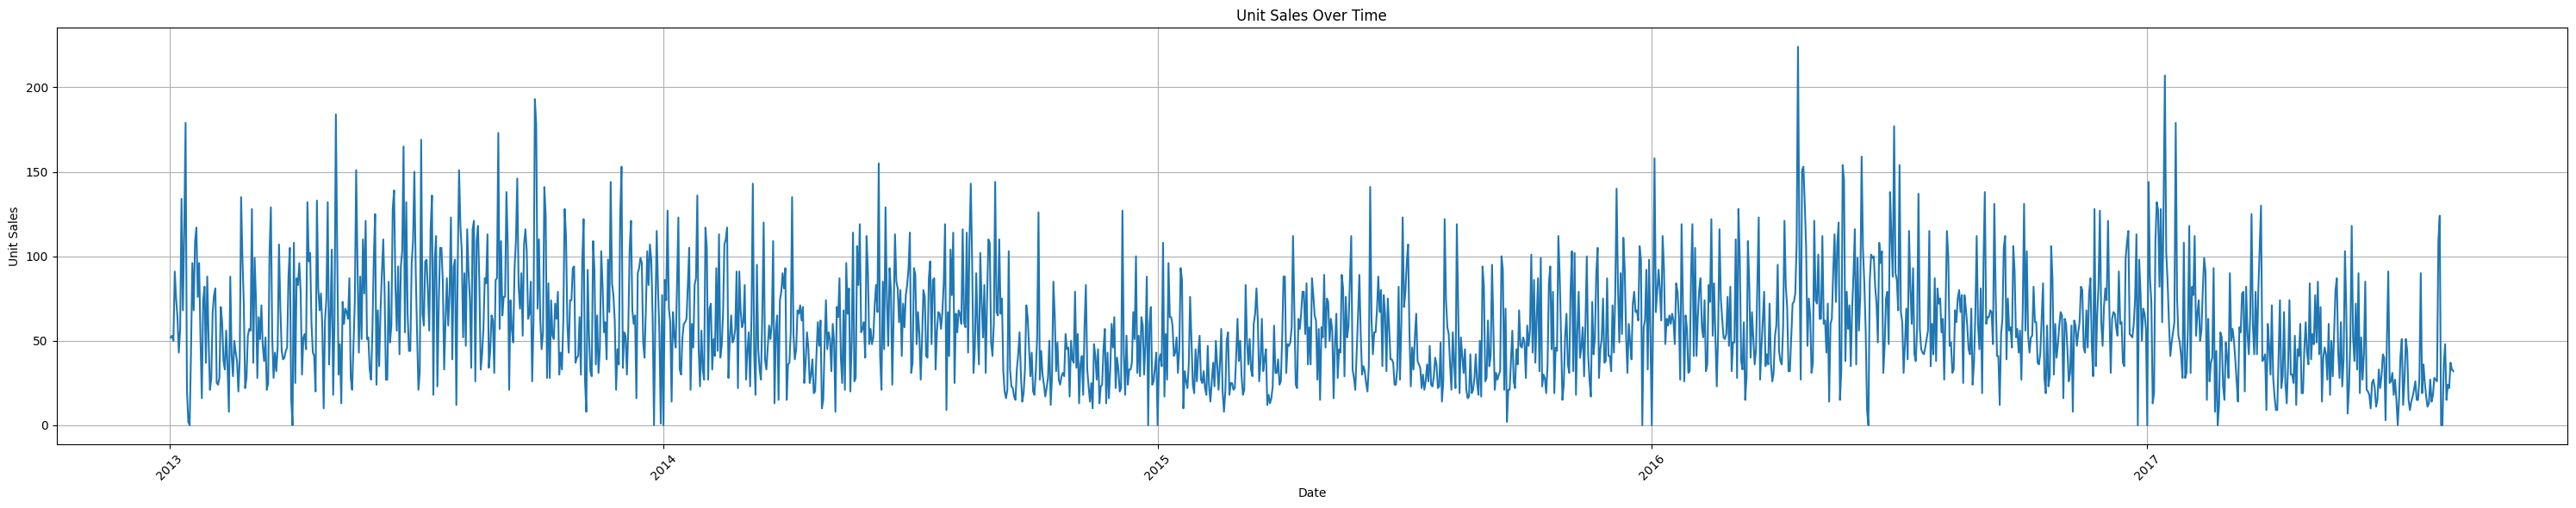

In [171]:
import matplotlib.pyplot as plt

# Plot unit_sales on date without dots
plt.figure(figsize=(30, 6))
plt.plot(item_df['date'], item_df['unit_sales'], linestyle='-')
plt.title('Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



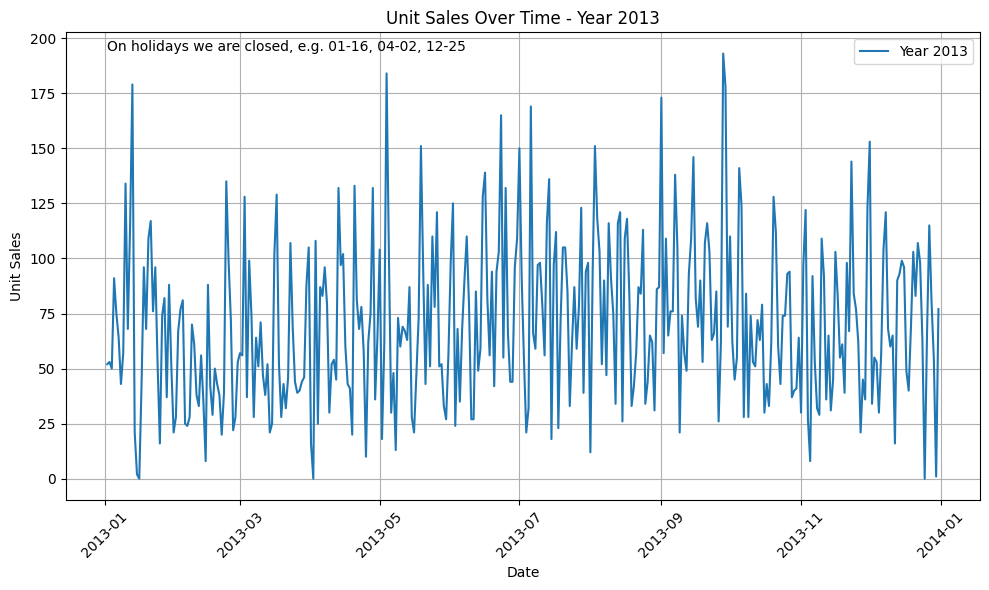

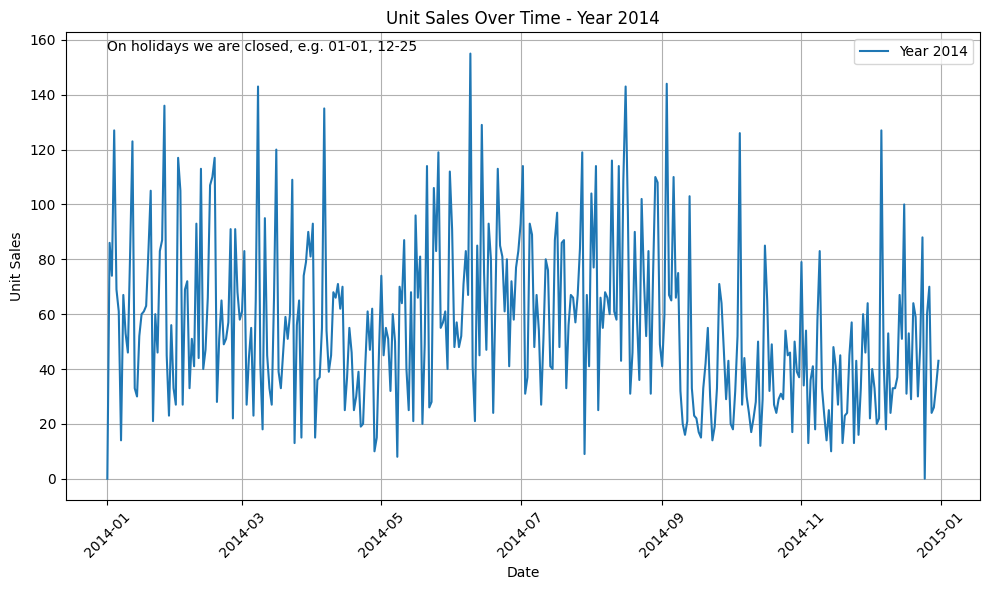

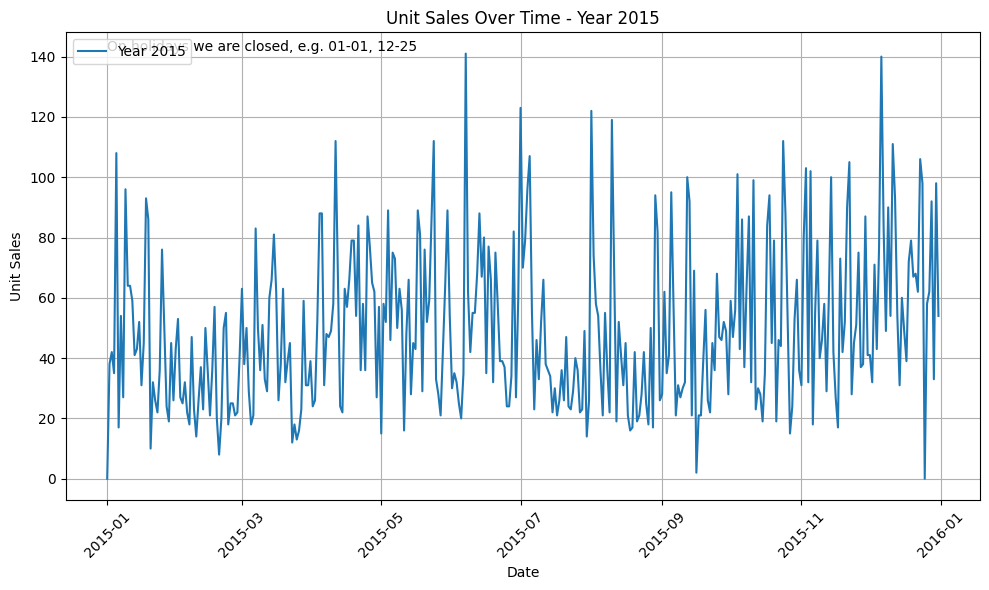

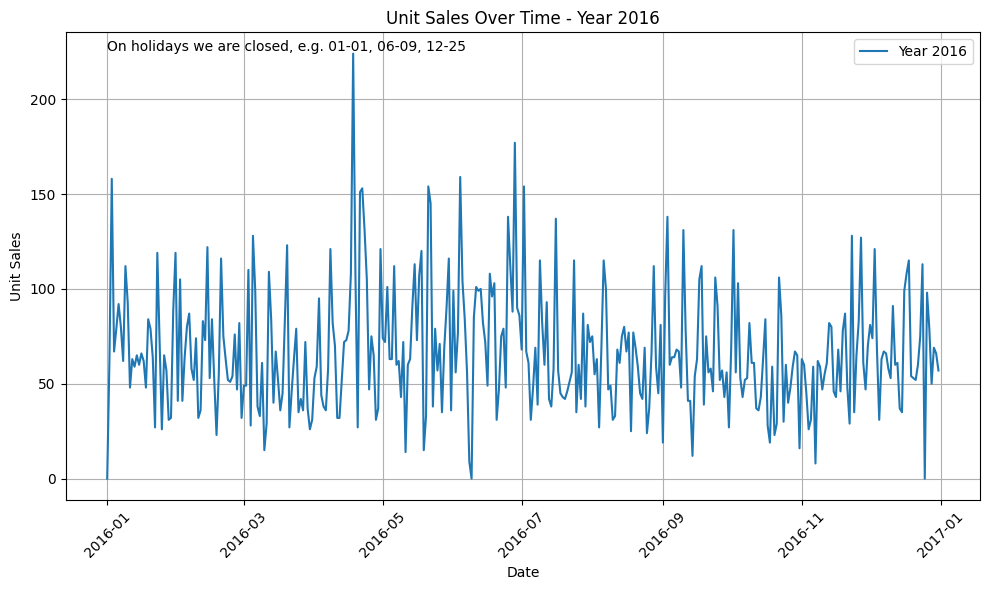

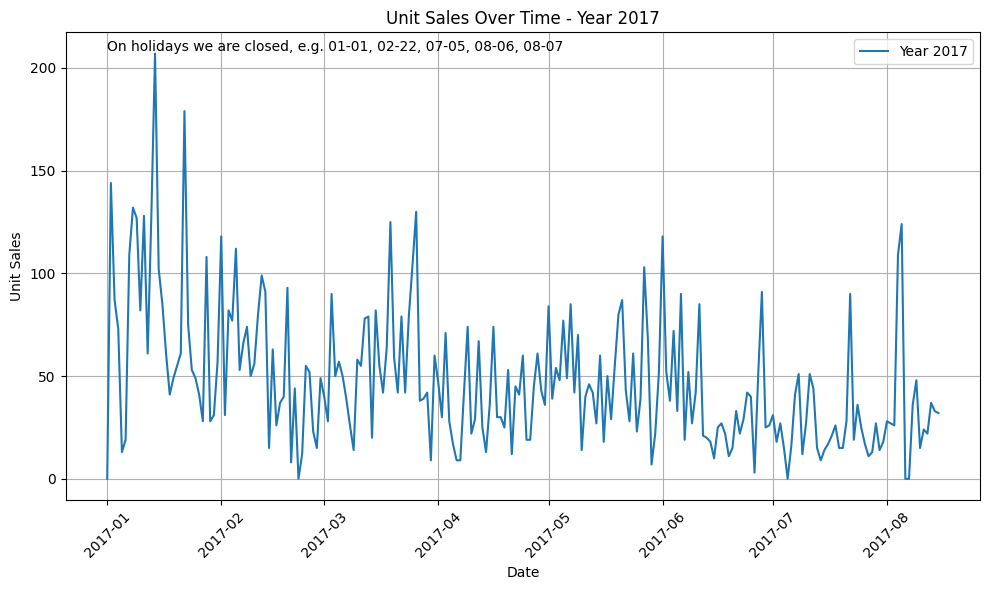

In [253]:
# Group data by year
grouped_by_year = item_df.groupby(item_df['date'].dt.year)

# Plot unit_sales on date for each year
for year, group in grouped_by_year:
    plt.figure(figsize=(10, 6))
    plt.plot(group['date'], group['unit_sales'], linestyle='-', label=f'Year {year}')
    plt.title(f'Unit Sales Over Time - Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Add note about holidays
    holidays = group[group['unit_sales'] == 0]['date'].dt.strftime('%m-%d').unique()
    holiday_note = f"On holidays we are closed, e.g. {', '.join(holidays)}"
    plt.text(group['date'].min(), group['unit_sales'].max(), holiday_note, fontsize=10, verticalalignment='bottom')

    plt.tight_layout()
    plt.show()

